In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing the CSV files
directory = "../result/experiments_output/"

# Initialize an empty list to store DataFrames
dataframes = []

# List all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dataframes.append(df)

In [50]:
os.listdir(directory)

['df_threshold_0.5_N_2_stop_ConsistencyN.csv',
 'df_threshold_0.4_N_5_stop_ConsistencyN.csv',
 'df_threshold_0.5_N_7_stop_PositiveN.csv',
 'df_threshold_0.5_N_4_stop_PositiveN.csv',
 'df_threshold_0.5_N_9_stop_PositiveN.csv',
 'df_threshold_0.4_N_2_stop_PositiveN.csv',
 'df_threshold_0.5_N_2_stop_PositiveN.csv',
 'df_threshold_0.4_N_4_stop_PositiveN.csv',
 'df_threshold_0.4_N_3_stop_ConsistencyN.csv',
 'df_threshold_0.5_N_10_stop_PositiveN.csv',
 'df_threshold_0.5_N_4_stop_ConsistencyN.csv',
 'df_threshold_0.4_N_4_stop_ConsistencyN.csv',
 'df_threshold_0.5_N_3_stop_ConsistencyN.csv',
 'df_threshold_0.4_N_5_stop_PositiveN.csv',
 'df_threshold_0.5_N_3_stop_PositiveN.csv',
 'df_threshold_0.4_N_3_stop_PositiveN.csv',
 'df_threshold_0.5_N_5_stop_PositiveN.csv',
 'df_threshold_0.5_N_8_stop_PositiveN.csv',
 'df_threshold_0.5_N_5_stop_ConsistencyN.csv',
 'df_threshold_0.5_N_6_stop_PositiveN.csv',
 'df_threshold_0.4_N_2_stop_ConsistencyN.csv']

In [51]:
df = dataframes[4]

/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_58402/722280327.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='value', hue='Metric', data=correctness_data, ci=None)


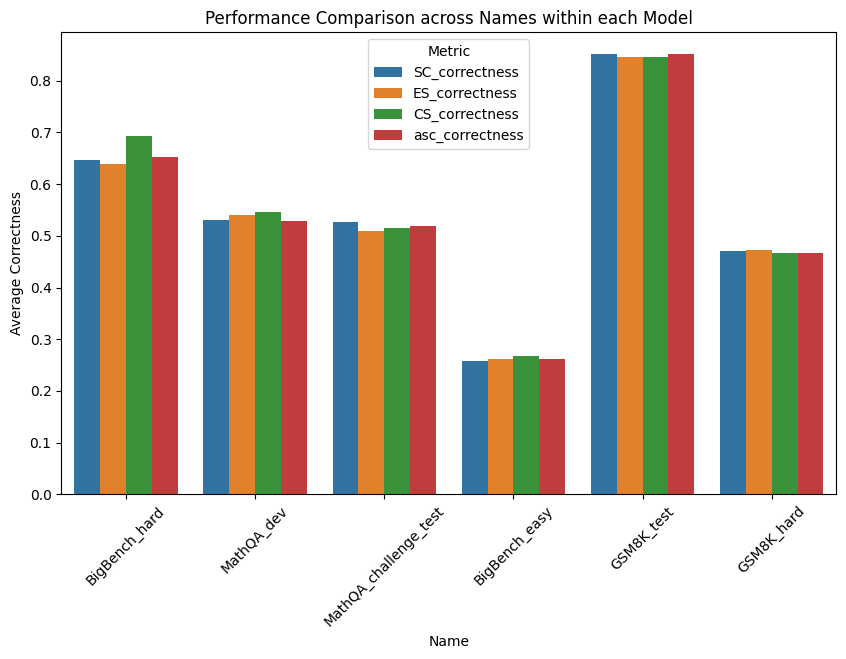

/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_58402/722280327.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='value', hue='Metric', data=correctness_data, ci=None)


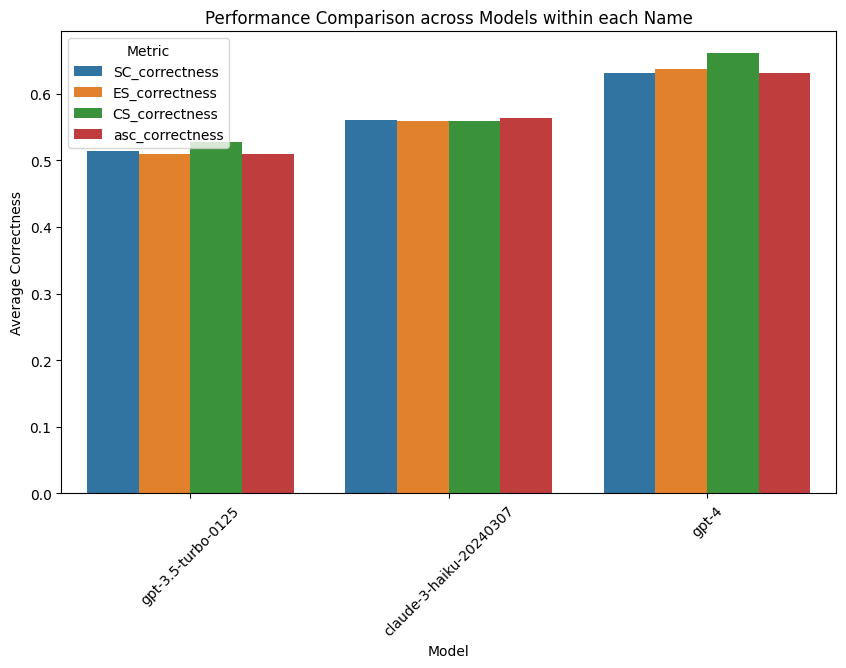

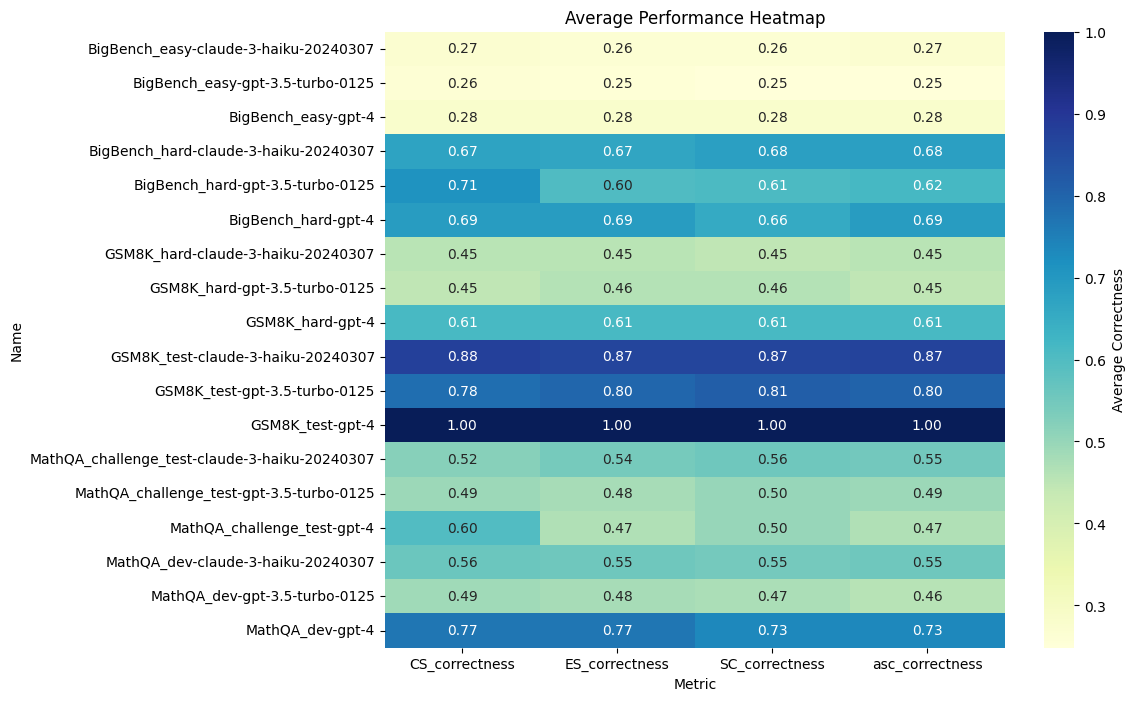

/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_58402/722280327.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='value', hue='Model', data=steps_data, ci=None)


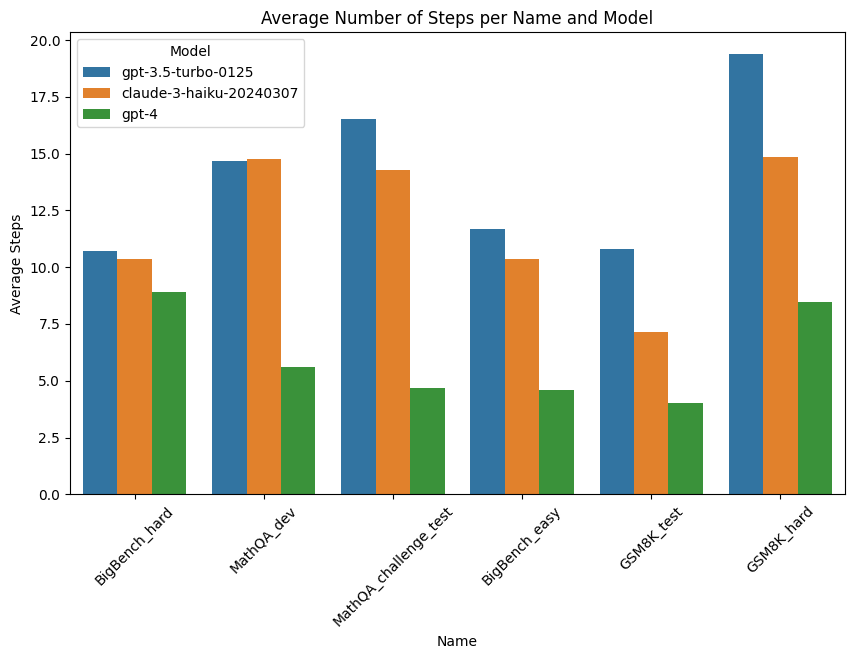

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame that includes 'asc_correctness' and 'asc_steps'

# Melt the DataFrame to convert it into a long format suitable for plotting
# Include 'asc_correctness' and 'asc_steps' in value_vars
melted_df = pd.melt(df, id_vars=['Name', 'Model'], value_vars=['SC_correctness', 'ES_correctness', 'CS_correctness', 'asc_correctness', 'asc_steps'], var_name='Metric')

# Plot 1: Compare average performance across different Names within each Model for correctness metrics
plt.figure(figsize=(10, 6))
# Filter melted_df to exclude 'asc_steps' for correctness comparison
correctness_data = melted_df[melted_df['Metric'] != 'asc_steps']
sns.barplot(x='Name', y='value', hue='Metric', data=correctness_data, ci=None)
plt.title('Performance Comparison across Names within each Model')
plt.xlabel('Name')
plt.ylabel('Average Correctness')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Compare average performance across different Models within each Name for correctness metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='value', hue='Metric', data=correctness_data, ci=None)
plt.title('Performance Comparison across Models within each Name')
plt.xlabel('Model')
plt.ylabel('Average Correctness')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Heatmap to visualize the average performance for each combination of Name and Model for correctness metrics
heatmap_data = correctness_data.groupby(['Name', 'Model', 'Metric'])['value'].mean().unstack(level=-1)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Correctness'})
plt.title('Average Performance Heatmap')
plt.xlabel('Metric')
plt.ylabel('Name')
plt.show()

# Plot 4: Visualize the average number of steps (asc_steps only)
plt.figure(figsize=(10, 6))
steps_data = melted_df[melted_df['Metric'] == 'asc_steps']
sns.barplot(x='Name', y='value', hue='Model', data=steps_data, ci=None)
plt.title('Average Number of Steps per Name and Model')
plt.xlabel('Name')
plt.ylabel('Average Steps')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.show()

/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_58402/157428221.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='value', hue='Metric', data=melted_df, ci=None)


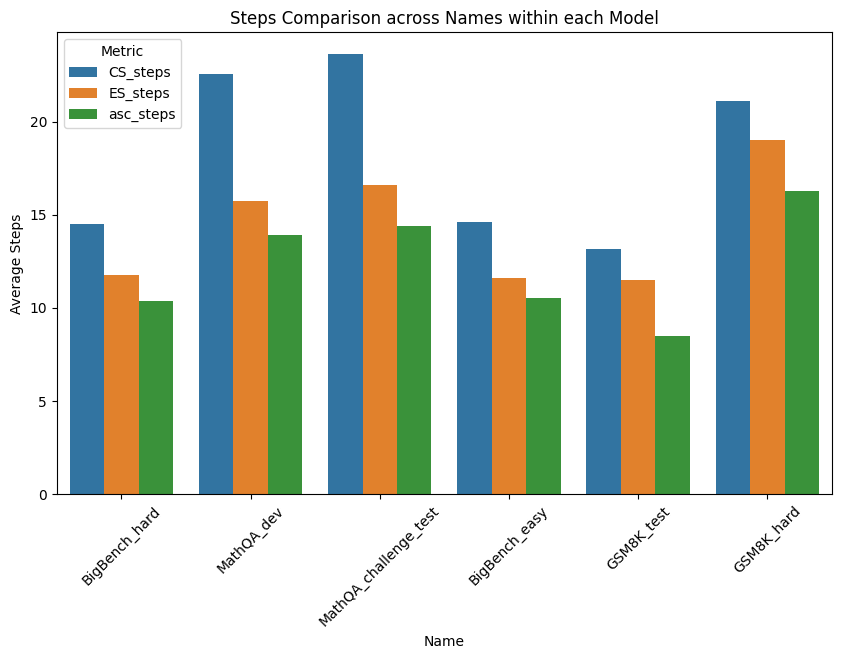

/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_58402/157428221.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='value', hue='Metric', data=melted_df, ci=None)


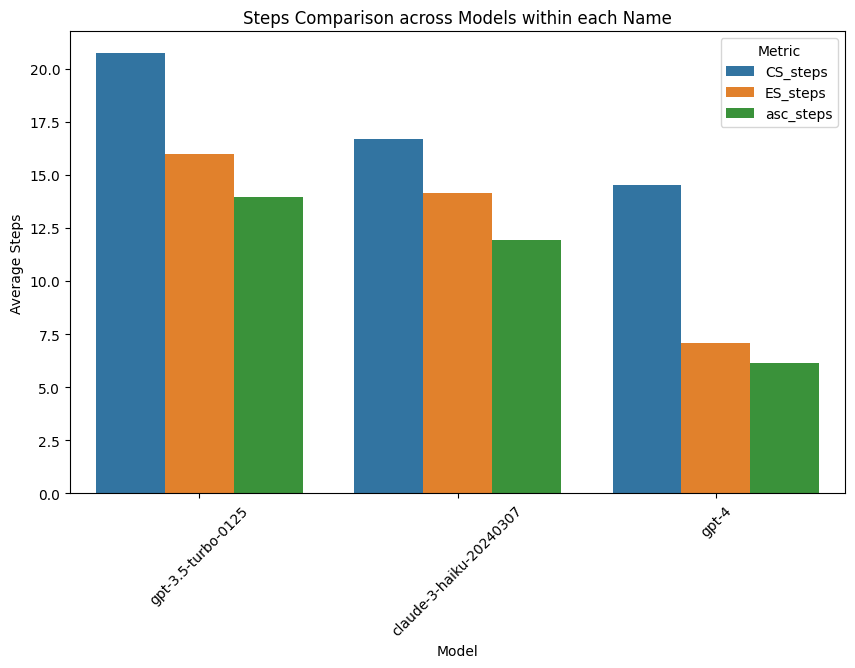

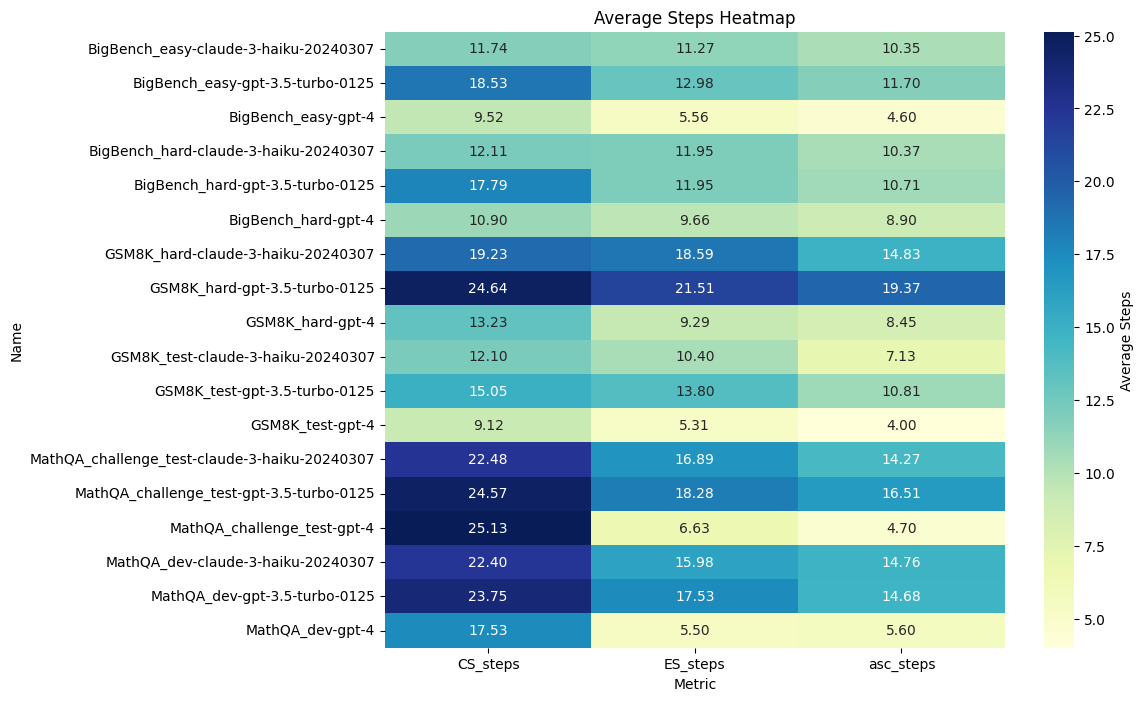

In [53]:
melted_df = pd.melt(df, id_vars=['Name', 'Model'], value_vars=['CS_steps', 'ES_steps', 'asc_steps'], var_name='Metric')

# Plot 1: Compare average steps across different Names within each Model
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='value', hue='Metric', data=melted_df, ci=None)
plt.title('Steps Comparison across Names within each Model')
plt.xlabel('Name')
plt.ylabel('Average Steps')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Compare average steps across different Models within each Name
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='value', hue='Metric', data=melted_df, ci=None)
plt.title('Steps Comparison across Models within each Name')
plt.xlabel('Model')
plt.ylabel('Average Steps')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Heatmap to visualize the average steps for each combination of Name and Model
heatmap_data = melted_df.groupby(['Name', 'Model', 'Metric'])['value'].mean().unstack(level=-1)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Steps'})
plt.title('Average Steps Heatmap')
plt.xlabel('Metric')
plt.ylabel('Name')
plt.show()


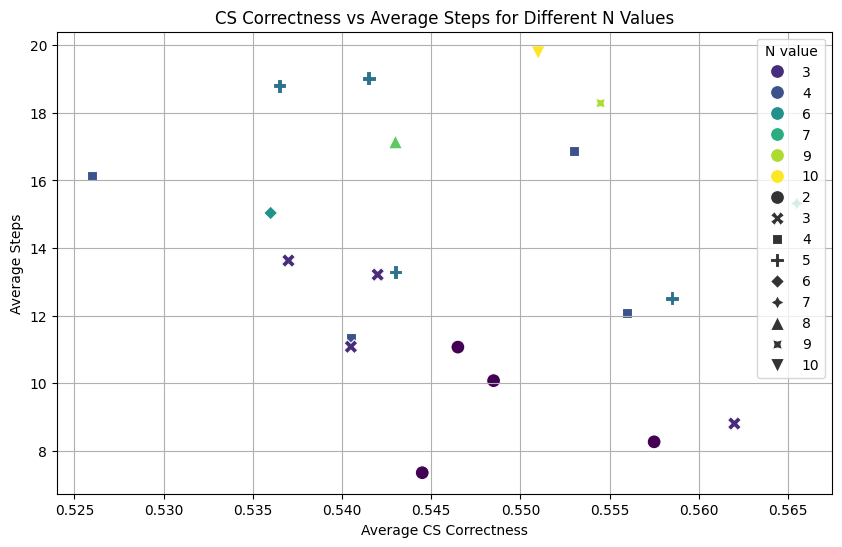

In [62]:


# Directory containing the CSV files
directory = "../result/experiments_output/"

# Initialize an empty list to store DataFrames
dataframes = []

# Dictionary to hold aggregated data
aggregated_data = {}

# List all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        # Extract the N value from the filename
        n_value = int(filename.split('_N_')[1].split('_')[0])
        
        # Calculate average correctness and steps
        avg_correctness = df['CS_correctness'].mean()
        avg_steps = df['CS_steps'].mean()
        
        # Check if this N value is already in the dictionary
        if n_value not in aggregated_data:
            aggregated_data[n_value] = {'correctness': [], 'steps': []}
        
        # Append the data
        aggregated_data[n_value]['correctness'].append(avg_correctness)
        aggregated_data[n_value]['steps'].append(avg_steps)

# Prepare data for plotting
plot_data = {
    'N_value': [],
    'Average_Correctness': [],
    'Average_Steps': []
}
for n, values in aggregated_data.items():
    plot_data['N_value'].extend([n] * len(values['correctness']))
    plot_data['Average_Correctness'].extend(values['correctness'])
    plot_data['Average_Steps'].extend(values['steps'])

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Average_Correctness', y='Average_Steps', hue='N_value', style='N_value', palette='viridis', s=100)
plt.title('CS Correctness vs Average Steps for Different N Values')
plt.xlabel('Average CS Correctness')
plt.ylabel('Average Steps')
plt.legend(title='N value')
plt.grid(True)
plt.show()


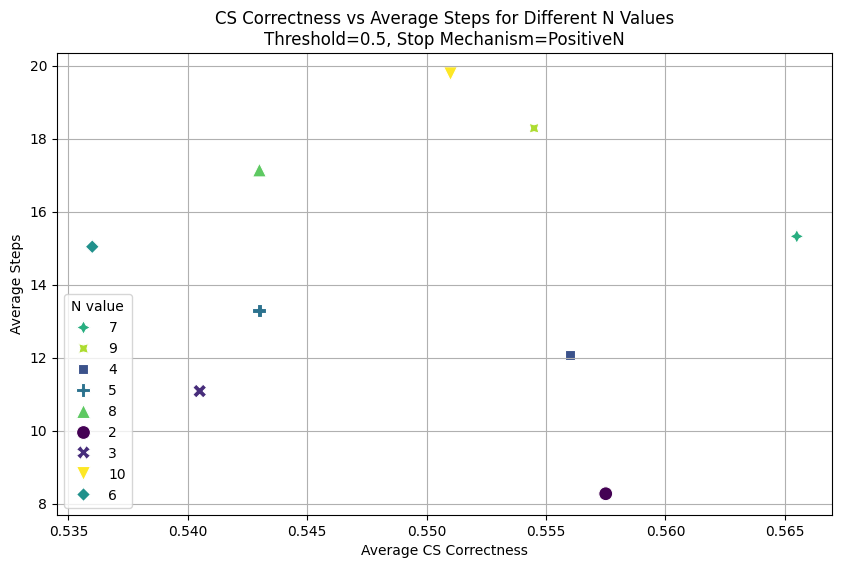

In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing the CSV files
directory = "../result/experiments_output/"

# Initialize an empty list to store DataFrames
dataframes = []

# Dictionary to hold aggregated data
aggregated_data = {}

# List all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Extract the threshold value and stop mechanism from the filename
        threshold_value = float(filename.split('_threshold_')[1].split('_')[0])
        stop_mechanism = filename.split('_stop_')[1].split('.')[0]
        
        # Check if the threshold is 0.5 and the stop mechanism is "PositiveN"
        if threshold_value == 0.5 and stop_mechanism == "PositiveN":
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            
            # Extract the N value from the filename
            n_value = int(filename.split('_N_')[1].split('_')[0])
            
            # Calculate average correctness and steps
            avg_correctness = df['CS_correctness'].mean()
            avg_steps = df['CS_steps'].mean()
            
            # Check if this N value is already in the dictionary
            if n_value not in aggregated_data:
                aggregated_data[n_value] = {'correctness': [], 'steps': []}
            
            # Append the data
            aggregated_data[n_value]['correctness'].append(avg_correctness)
            aggregated_data[n_value]['steps'].append(avg_steps)

# Prepare data for plotting
plot_data = {
    'N_value': [],
    'Average_Correctness': [],
    'Average_Steps': []
}

for n, values in aggregated_data.items():
    plot_data['N_value'].extend([n] * len(values['correctness']))
    plot_data['Average_Correctness'].extend(values['correctness'])
    plot_data['Average_Steps'].extend(values['steps'])

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Plotting
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Average_Correctness', y='Average_Steps', hue='N_value', style='N_value', palette='viridis', s=100, legend="full")
plt.title('CS Correctness vs Average Steps for Different N Values\nThreshold=0.5, Stop Mechanism=PositiveN')
plt.xlabel('Average CS Correctness')
plt.ylabel('Average Steps')

# Modify legend to display one entry per N value
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
plt.legend(unique_handles, unique_labels, title='N value')

plt.grid(True)
plt.show()

In [64]:
plot_df

,N_value,Average_Correctness,Average_Steps
0,7,0.5655,15.3205
1,4,0.5560,12.0760
2,9,0.5545,18.2835
3,2,0.5575,8.2690
4,10,0.5510,19.7765
5,3,0.5405,11.0815
6,5,0.5430,13.2905
7,8,0.5430,17.1390
8,6,0.5360,15.0370


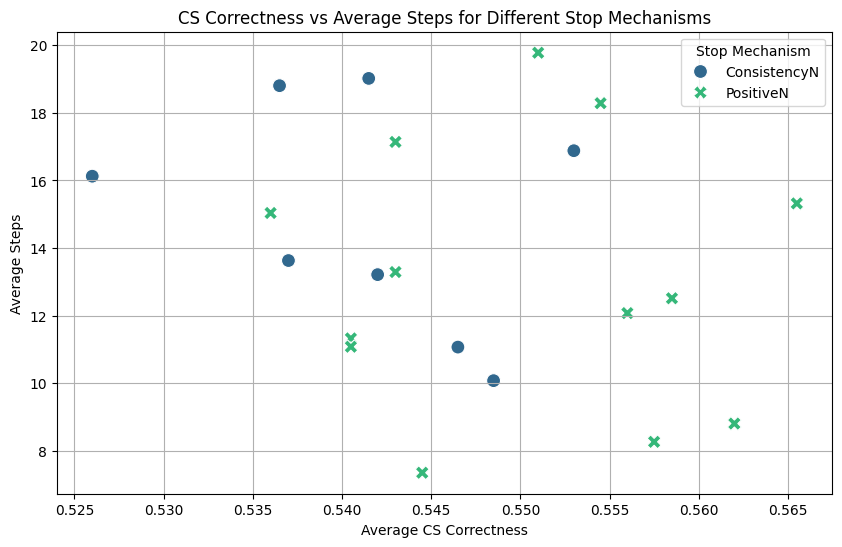

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing the CSV files
directory = "../result/experiments_output/"

# Initialize an empty list to store DataFrames
dataframes = []

# Dictionary to hold aggregated data
aggregated_data = {}

# List all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
        # Extract the stop mechanism from the filename
        stop_mechanism = filename.split('_stop_')[1].split('.')[0]
        
        # Calculate average correctness and steps
        avg_correctness = df['CS_correctness'].mean()
        avg_steps = df['CS_steps'].mean()
        
        # Check if this stop mechanism is already in the dictionary
        if stop_mechanism not in aggregated_data:
            aggregated_data[stop_mechanism] = {'correctness': [], 'steps': []}
        
        # Append the data
        aggregated_data[stop_mechanism]['correctness'].append(avg_correctness)
        aggregated_data[stop_mechanism]['steps'].append(avg_steps)

# Prepare data for plotting
plot_data = {
    'Stop_Mechanism': [],
    'Average_Correctness': [],
    'Average_Steps': []
}

for mechanism, values in aggregated_data.items():
    plot_data['Stop_Mechanism'].extend([mechanism] * len(values['correctness']))
    plot_data['Average_Correctness'].extend(values['correctness'])
    plot_data['Average_Steps'].extend(values['steps'])

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Average_Correctness', y='Average_Steps', hue='Stop_Mechanism', style='Stop_Mechanism', palette='viridis', s=100)
plt.title('CS Correctness vs Average Steps for Different Stop Mechanisms')
plt.xlabel('Average CS Correctness')
plt.ylabel('Average Steps')
plt.legend(title='Stop Mechanism')
plt.grid(True)
plt.show()

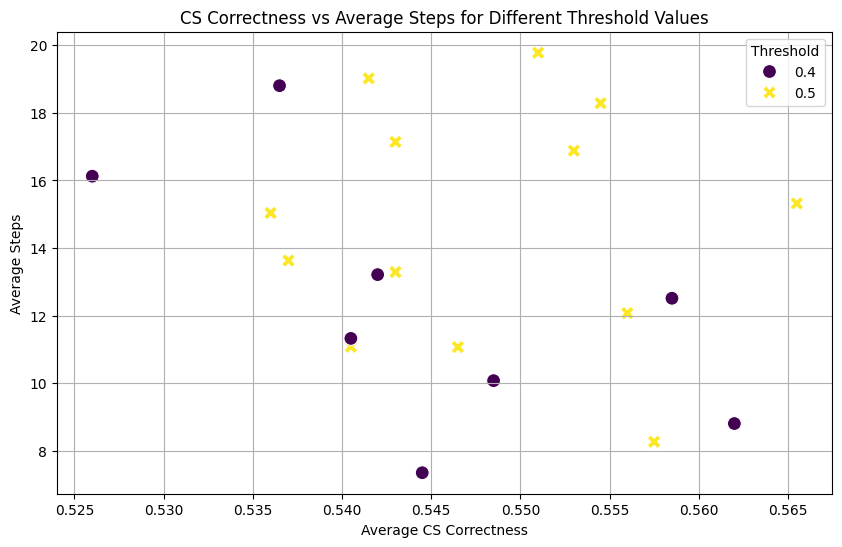

In [56]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing the CSV files
directory = "../result/experiments_output/"

# Initialize an empty list to store DataFrames
dataframes = []

# Dictionary to hold aggregated data
aggregated_data = {}

# List all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
        # Extract the threshold value from the filename
        threshold_value = float(filename.split('_threshold_')[1].split('_')[0])
        
        # Calculate average correctness and steps
        avg_correctness = df['CS_correctness'].mean()
        avg_steps = df['CS_steps'].mean()
        
        # Check if this threshold value is already in the dictionary
        if threshold_value not in aggregated_data:
            aggregated_data[threshold_value] = {'correctness': [], 'steps': []}
        
        # Append the data
        aggregated_data[threshold_value]['correctness'].append(avg_correctness)
        aggregated_data[threshold_value]['steps'].append(avg_steps)

# Prepare data for plotting
plot_data = {
    'Threshold': [],
    'Average_Correctness': [],
    'Average_Steps': []
}

for threshold, values in aggregated_data.items():
    plot_data['Threshold'].extend([threshold] * len(values['correctness']))
    plot_data['Average_Correctness'].extend(values['correctness'])
    plot_data['Average_Steps'].extend(values['steps'])

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Average_Correctness', y='Average_Steps', hue='Threshold', style='Threshold', palette='viridis', s=100)
plt.title('CS Correctness vs Average Steps for Different Threshold Values')
plt.xlabel('Average CS Correctness')
plt.ylabel('Average Steps')
plt.legend(title='Threshold')
plt.grid(True)
plt.show()